# _import modules:_

In [1]:
# enable In-Line MatPlotLib
%matplotlib inline

In [2]:
# import:
from ggplot import aes, geom_line, geom_point, ggplot, ggtitle, xlab, ylab
from numpy import log, nan
from os import system
from pandas import DataFrame, melt, read_csv
from random import seed
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

system('pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies')
from ChicagoBoothML_Helpy.EvaluationMetrics import rmse

seed(99)

# import Used Cars data set

In [3]:
# read Boston Housing data into data frame
used_cars = read_csv(
    'https://raw.githubusercontent.com/ChicagoBoothML/DATA___UsedCars/master/UsedCars_small.csv')
used_cars.sort(columns='mileage', inplace=True)
used_cars

,price,trim,isOneOwner,mileage,year,color,displacement
923,75900,other,f,1997,2013,Black,other
553,68995,550,f,2325,2012,Silver,4.6
800,65995,other,f,2714,2013,Black,other
970,78743,550,t,3779,2013,White,4.6
131,73995,other,f,4171,2010,other,5.5
996,72991,550,f,5562,2013,Black,4.6
364,49999,550,f,5884,2011,Black,5.5
48,68900,550,t,6422,2013,Silver,4.6
820,79888,550,t,7153,2013,White,4.6
49,64995,550,f,7944,2013,other,4.6


# _define plotting functions_

In [4]:
def plot_used_cars_data(used_cars_data,
                        x_name='mileage', y_name='price', y_hat_name='predicted_price',
                        title='Used Cars: price vs. mileage',
                        plot_predicted=True):
    g = ggplot(aes(x=x_name, y=y_name), data=used_cars_data) +\
        geom_point(size=10, color='blue') +\
        ggtitle(title) +\
        xlab(x_name) + ylab(y_name)
    if plot_predicted:
        g += geom_line(aes(x=x_name, y=y_hat_name), size=2, color='darkorange')
    return g

# Models with 1 Predictor Variable (_mileage_ only)

## "Eye-Ball" KNN

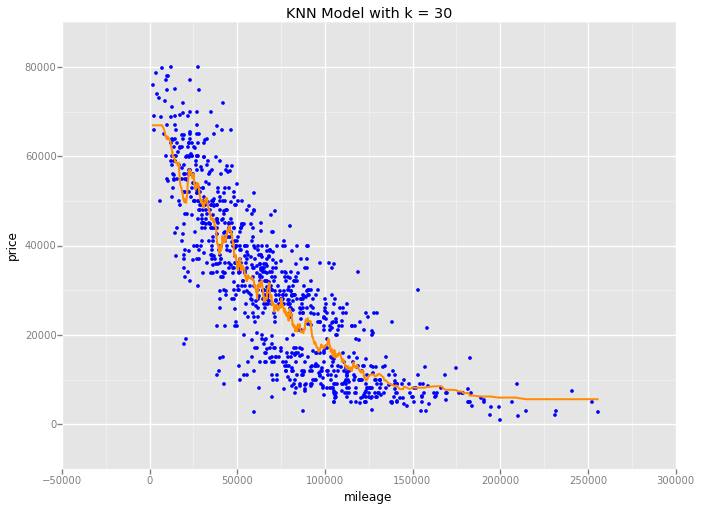

<ggplot: (281083869)>

In [5]:
k = 30
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=used_cars[['mileage']], y=used_cars.price)
used_cars['predicted_price'] = knn_model.predict(used_cars[['mileage']])

plot_used_cars_data(used_cars, title='KNN Model with k = %i' % k)

## Select $k$ by Cross Validation

In [ ]:
# define Root-Mean-Square-Error scoring/evaluation function
# compliant with what SciKit Learn expects in this guide:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score
def rmse_score(estimator, X, y):
    y_hat = estimator.predict(X)
    return rmse(y_hat, y)

K_RANGE = range(2, 201)
NB_CROSS_VALIDATION_FOLDS = 5
NB_CROSS_VALIDATION_REPEATS = 6

In [ ]:
def knn_cross_validations(used_cars_data,
                          X_vars=['mileage'], y_var='price',
                          k_range=K_RANGE,
                          nb_cross_validation_folds=NB_CROSS_VALIDATION_FOLDS,
                          nb_cross_validation_repeats=NB_CROSS_VALIDATION_REPEATS,
                          plot=True, plot_title='Cross Validations'):
    
    cross_validations_avg_rmse = DataFrame(dict(k=k_range, model_complexity=-log(k_range)))
    cross_validations_avg_rmse['cv_repeats_avg_rmse'] = 0.
    cv_repeats_column_names = []
    
    for r in range(nb_cross_validation_repeats):
        cv_repeat_column_name = 'cv_repeat_%i_rmse' % r
        cv_repeats_column_names.append(cv_repeat_column_name)
        cross_validations_avg_rmse[cv_repeat_column_name] = nan
    
        for k in k_range:
            knn_model = KNeighborsRegressor(n_neighbors=k)
            avg_rmse_score = cross_val_score(
                knn_model,
                X=used_cars_data[X_vars],
                y=used_cars_data[y_var],
                cv=KFold(n=len(used_cars_data),
                         n_folds=nb_cross_validation_folds,
                         shuffle=True),
                scoring=rmse_score).mean()
            cross_validations_avg_rmse.ix[
                cross_validations_avg_rmse.k==k, cv_repeat_column_name] = avg_rmse_score
        
        cross_validations_avg_rmse.cv_repeats_avg_rmse +=\
            (cross_validations_avg_rmse[cv_repeat_column_name] -
             cross_validations_avg_rmse.cv_repeats_avg_rmse) / (r + 1)
    
    if plot:
        cross_validations_avg_rmse___longdf = melt(
            cross_validations_avg_rmse,
            id_vars=['model_complexity', 'cv_repeats_avg_rmse'],
            value_vars=cv_repeats_column_names)
        
        plot = ggplot(aes(x='model_complexity', y='value', color='variable'),
                      data=cross_validations_avg_rmse___longdf) +\
            geom_line(size=1, linetype='dashed') +\
            geom_line(aes(x='model_complexity', y='cv_repeats_avg_rmse'),
                      data=cross_validations_avg_rmse___longdf,
                      size=2, color='black') +\
            ggtitle(plot_title) +\
            xlab('Model Complexity (-log K)') + ylab('OOS RMSE')
        
    return dict(avg_rmse_df=cross_validations_avg_rmse, plot=plot)


knn_cross_validations___1predictor = knn_cross_validations(used_cars)
knn_cross_validations___1predictor['plot']

Best $k$ that minimizes average cross-validation RMSE:

In [ ]:
best_k_index = knn_cross_validations___1predictor['avg_rmse_df']['cv_repeats_avg_rmse'].argmin()
best_k = K_RANGE[best_k_index]
best_k

In [ ]:
k = best_k
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=used_cars[['mileage']], y=used_cars.price)
used_cars['predicted_price'] = knn_model.predict(used_cars[['mileage']])

plot_used_cars_data(used_cars, title='KNN Model with k = %i' % k)

## Predict Price of Used Car with 100,000 Miles

In [ ]:
test_case = DataFrame(dict(mileage=[1e5]))

Best-k KNN Model predicts price of:

In [ ]:
knn_model.predict(test_case)

# Models with 2 Predictor Variables (_mileage_ & _year_)

In [ ]:
scaler = StandardScaler()
scaler.fit(used_cars[['mileage', 'year']])

used_cars_scaled = used_cars[['price']].copy()

scaled = scaler.transform(used_cars[['mileage', 'year']])
used_cars_scaled['mileage'] = scaled[:, 0]
used_cars_scaled['year'] = scaled[:, 1]

ggplot(aes(x='mileage', y='year'), data=used_cars_scaled) +\
    geom_point(size=5, color='blue') +\
    ggtitle('Predictors after Standard Scaling') +\
    xlab('mileage') + ylab('year')

In [ ]:
knn_cross_validations___2predictors =\
    knn_cross_validations(used_cars_scaled,
                          X_vars=['mileage', 'year'])
    
knn_cross_validations___2predictors['plot']

The 2-predictor model seems to be much better than the 1-predictor one in terms of out-of-sample predictive performance:

In [ ]:
cross_validations_avg_rmse = DataFrame(dict(k=K_RANGE, model_complexity=-log(K_RANGE)))
cross_validations_avg_rmse['one_predictor'] =\
    knn_cross_validations___1predictor['avg_rmse_df']['cv_repeats_avg_rmse']
cross_validations_avg_rmse['two_predictor'] =\
    knn_cross_validations___2predictors['avg_rmse_df']['cv_repeats_avg_rmse']
cross_validations_avg_rmse___longdf =\
    melt(cross_validations_avg_rmse,
         id_vars=['k', 'model_complexity'])
    
ggplot(aes(x='model_complexity', y='value', color='variable'),
       data=cross_validations_avg_rmse___longdf) +\
    geom_line(size=3) +\
    ggtitle('Models with 1 vs. 2 Predictors') +\
    xlab('Model Complexity (-log K)') + ylab('OOS RMSE')    

Best $k$ for the 2-predictor model:

In [ ]:
best_k_index = knn_cross_validations___2predictors['avg_rmse_df']['cv_repeats_avg_rmse'].argmin()
best_k = K_RANGE[best_k_index]
best_k

## Predicted Price of Used Car of Year 2008 with 75,000 Miles:

In [ ]:
test_case = DataFrame(dict(mileage=[75000.], year=[2008.]))
test_case_scaled = scaler.transform(test_case)

k = best_k
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=used_cars_scaled[['mileage', 'year']], y=used_cars_scaled.price)
knn_model.predict(test_case_scaled)